In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from matplotlib.sankey import Sankey
import utm 
import os
import requests
import json

#import pyarrow


In [2]:
#%run data_preparation.ipynb
%run functions.ipynb

folder_path = os.path.join(os.getcwd(), "data", "2019")
# List all files in the folder
file_names = os.listdir(folder_path)
# Initialize an empty list to store DataFrame chunks
chunks = []
# Loop through each file, load it, and append it to the list
for file_name in file_names:
    if file_name.endswith(".pkl.gz"):
        file_path = os.path.join(folder_path, file_name)
        chunk = pd.read_pickle(file_path, compression='gzip')
        chunks.append(chunk)

# Concatenate all DataFrame chunks into a single DataFrame
data_2019 = pd.concat(chunks, ignore_index=True)

print("Accessible dataframes    Description                            # of columns  ")
print("data_2019                Gives data for 2019-Baseline           15")


Accessible dataframes    Description                            # of columns  
data_2019                Gives data for 2019-Baseline           15


In [3]:
#data_2019.head()
#cd = data_2019.iloc[0:2000000]
print(len(data_2019))
Target = pd.to_datetime('2019-04-02').date()
April=data_2019[(data_2019['starttime'].dt.month == 4)]
print(len(April))

#cd=cd[(cd['starttime'].dt.date == Target)]
cd = April.iloc[0:500000]
#cd.tail()
print(len(cd))

20551697
1766094
500000


In [5]:


#cd.rename(columns={"tripduration": "Trip Duration",
 #               "starttime": "Start Time", 
  #              "stoptime": "Stop Time",  
#                "start station id": "Start Station ID",
 #               "start station latitude": "Start Station Latitude", 
 #               "start station longitude": "Start Station Longitude",
 ##               "end station id": "End Station ID",
  #              "end station name": "End Station Name",
   #             "end station latitude": "End Station Latitude", 
    #            "end station longitude": "End Station Longitude"})

In [4]:
cd.dtypes


tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name               category
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                 category
end station latitude              float64
end station longitude             float64
bikeid                           category
usertype                         category
birth year                          int64
gender                           category
dtype: object

In [4]:

test = cd[(cd['starttime'].dt.hour == 8) & (cd['gender'] == 1 )]
test.head()
print(len(test))
print(len(cd))

32688
500000


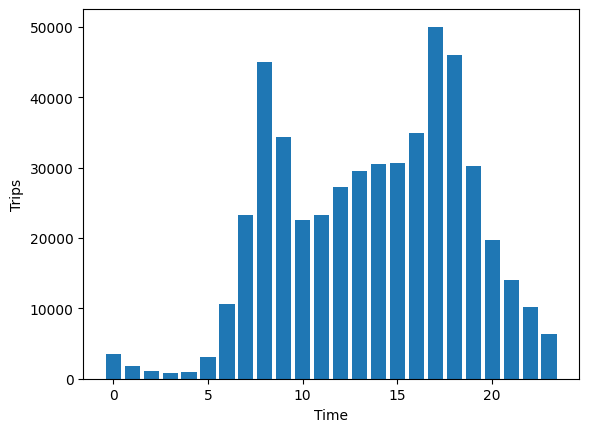

In [5]:
#hours = cd['Start Time'].str[11:13].to_list()
#hours_uq = sorted(set(hours))
hours_uq = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

hours_count = []
for t in hours_uq:
    test = cd[cd['starttime'].dt.hour == t]
    hours_count.append(len(test))


plt.bar(hours_uq, hours_count)
plt.xlabel('Time')
plt.ylabel('Trips')
plt.show()

In [6]:
test = cd[cd['starttime'].dt.month == 12]
print(len(test))

0


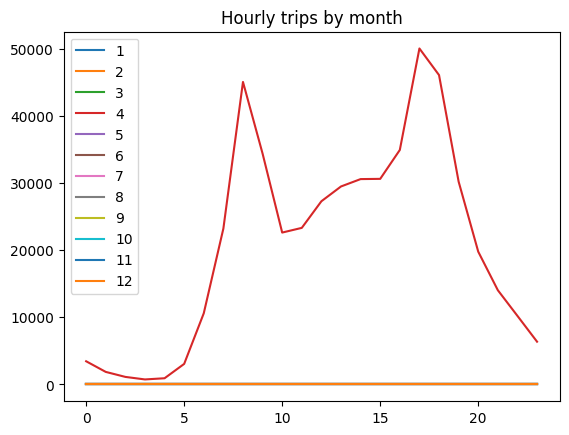

In [7]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.title('Hourly trips by month')
for m in months:
    hours_count = []
    for t in hours_uq:  
        test = cd[(cd['starttime'].dt.hour == t) & (cd['starttime'].dt.month == m) ]
        hours_count.append(len(test))
    plt.plot(hours_uq, hours_count, label=m)
plt.legend()
plt.show()



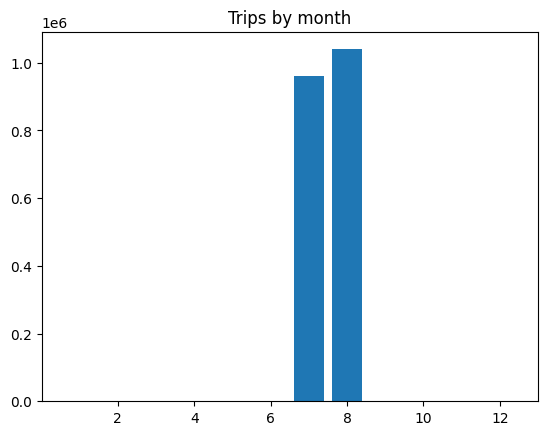

In [37]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.title('Trips by month')

month_count=[]
for m in months:  
        test = cd[ (cd['starttime'].dt.month == m) ]
        month_count.append(len(test))
plt.bar(months, month_count)
plt.show()

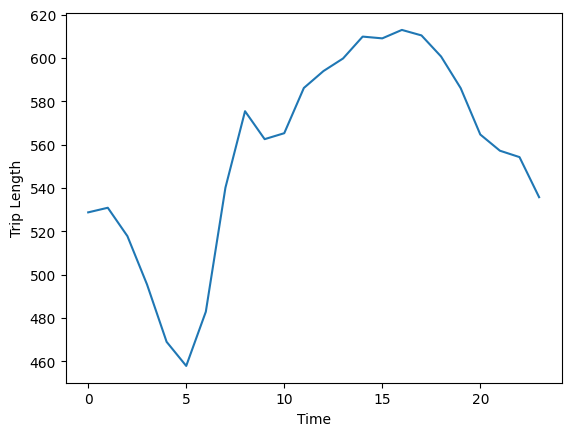

In [8]:
cd1=cd[cd['tripduration']<1440]
trip_duration= []
#trip_error = []

for t in hours_uq:
    test = cd1[(cd1['starttime'].dt.hour == t)]
    x = test['tripduration'].mean()
    trip_duration.append(x)
    #std_err = test['tripduration'].std() / np.sqrt(len( test['tripduration']))
    #trip_error.append(std_err)


plt.errorbar(hours_uq, trip_duration)# yerr=trip_error)
plt.xlabel('Time')
plt.ylabel('Trip Length')
plt.show()

In [4]:
#cd = data_2019.iloc[0:4000000]
s_stat = cd.iloc[:,3:7].drop_duplicates().rename(columns={'start station id': "ID", 'start station name': "Name", 'start station latitude': "Latitude", 'start station longitude': "Longitude"})
e_stat = cd.iloc[:,7:11].drop_duplicates().rename(columns={'end station id': "ID", 'end station name': "Name", 'end station latitude': "Latitude", 'end station longitude': "Longitude"})
stations = pd.concat([s_stat,e_stat]).drop_duplicates()

stations.tail()

ID                       Name   Latitude  Longitude
3548998  3199.0               Newport Pkwy  40.728745 -74.032108
3695099  3184.0                Paulus Hook  40.714145 -74.033552
3735475   247.0     Perry St & Bleecker St  40.735354 -74.004831
3766634  3763.0  Wyckoff Av & Jefferson St  40.707165 -73.923711
3924870   260.0       Broad St & Bridge St  40.703652 -74.011678

In [5]:
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    s_count = len(cd[cd['start station name'] == station_name])
    station_start_count.append(s_count)
    e_count = len(cd[cd['end station name'] == station_name])
    station_end_count.append(e_count)

stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count
print(station_start_count)
print(station_end_count)


[1274, 340, 161, 1554, 1215, 838, 1105, 339, 323, 738, 1660, 169, 211, 1251, 587, 603, 756, 2041, 826, 354, 1516, 1723, 1622, 1011, 1275, 485, 630, 1326, 824, 1334, 210, 1413, 2017, 2148, 2928, 319, 461, 364, 393, 927, 150, 454, 2870, 1071, 2074, 1073, 602, 297, 288, 1162, 933, 477, 268, 1737, 159, 464, 285, 804, 523, 1431, 309, 133, 2458, 1351, 609, 546, 1441, 511, 1648, 1361, 1083, 1319, 437, 1838, 1773, 191, 982, 1042, 1162, 1310, 2571, 232, 647, 1934, 1622, 1464, 1260, 1445, 755, 1331, 679, 1676, 509, 1668, 686, 481, 1251, 509, 1056, 1863, 1493, 401, 951, 590, 1038, 1782, 356, 389, 1169, 1374, 1043, 1099, 1675, 1559, 284, 1621, 1641, 2108, 895, 399, 1334, 230, 604, 702, 534, 668, 772, 884, 325, 1060, 357, 471, 1161, 952, 1694, 256, 165, 546, 424, 915, 262, 231, 1846, 202, 1750, 1501, 1233, 405, 1059, 1098, 377, 185, 87, 1138, 462, 917, 1198, 733, 1125, 338, 348, 852, 670, 802, 851, 403, 1356, 1398, 2042, 1324, 970, 1483, 555, 1510, 780, 1407, 333, 783, 652, 513, 931, 195, 1507, 443

In [8]:

# Filter stations where Latitude is not 0
stations = stations[stations['Latitude'] != 0]

# Normalize 'Start Count' and 'End Count'
stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
stations['end_w'] = stations['End Count'] / stations['End Count'].max()

# Create a map centered around a specific latitude and longitude
mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Add markers for each station
for idx, station in stations.iterrows():
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['start_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity=station['start_w'],  # Using 'Start Count' for opacity
                        fill_color='blue',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)
    
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['end_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity=station['end_w'],  # Using 'End Count' for opacity
                        fill_color='red',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)

# Display the map
mymap

: 

In [7]:
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    s_count = len(cd[(cd['start station name'] == station_name) & (cd['starttime'].dt.hour >=7) & (cd['starttime'].dt.hour <=9)] )
    station_start_count.append(s_count)
    e_count = len(cd[(cd['end station name'] == station_name) & (cd['starttime'].dt.hour >=7) & (cd['starttime'].dt.hour <=9)])
    station_end_count.append(e_count)
stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count




stations = stations[stations['Latitude'] != 0]
stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
stations['end_w'] = stations['End Count'] / stations['End Count'].max()
mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

for idx, station in stations.iterrows():
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['start_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity=station['start_w'],  # Using 'Start Count' for opacity
                        fill_color='blue',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)
    
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['end_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity=station['end_w'],  # Using 'End Count' for opacity
                        fill_color='red',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)

# Display the map
mymap

: 

In [5]:
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    s_count = len(cd[(cd['start station name'] == station_name) & (cd['starttime'].dt.hour >=17) & (cd['starttime'].dt.hour <=19)] )
    station_start_count.append(s_count)
    e_count = len(cd[(cd['end station name'] == station_name) & (cd['starttime'].dt.hour >=17) & (cd['starttime'].dt.hour <=19)])
    station_end_count.append(e_count)
stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count




stations = stations[stations['Latitude'] != 0]
stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
stations['end_w'] = stations['End Count'] / stations['End Count'].max()
mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

for idx, station in stations.iterrows():
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['start_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity = station['start_w'],  # Using 'Start Count' for opacity
                        fill_color='blue',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)
    
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['end_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity= station['end_w'],  # Using 'End Count' for opacity
                        fill_color='red',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)

# Display the map
mymap

In [6]:
station_start_count = []
station_end_count = []
for station_name in stations['Name']:
    s_count = len(cd[(cd['start station name'] == station_name) & (cd['starttime'].dt.hour >=10) & (cd['starttime'].dt.hour <=16)] )
    station_start_count.append(s_count)
    e_count = len(cd[(cd['end station name'] == station_name) & (cd['starttime'].dt.hour >=10) & (cd['starttime'].dt.hour <=16)])
    station_end_count.append(e_count)
stations['Start Count'] = station_start_count
stations['End Count'] = station_end_count




stations = stations[stations['Latitude'] != 0]
stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
stations['end_w'] = stations['End Count'] / stations['End Count'].max()
mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

for idx, station in stations.iterrows():
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['start_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity = station['start_w'],  # Using 'Start Count' for opacity
                        fill_color='blue',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)
    
    folium.CircleMarker(location=[station['Latitude'], station['Longitude']],
                        radius=25*station['end_w'],  # Adjust the size of each marker
                        fill=True,
                        fill_opacity= station['end_w'],  # Using 'End Count' for opacity
                        fill_color='red',  # Marker color without outline
                        color=None,  # Remove the marker outline
                        ).add_to(mymap)

# Display the map
mymap

: 

In [17]:
#    source = []
#    target = []
#    for s in range(len(largestationlist)):
#        for t in range(len(largestationlist)):
#        source.append(largestationlist[s])
#        target.append(largestationlist[t])
#
 #   value = []
 #   for i in range(len(largestationlist)):
  #      start = source[i]
#        end = target[i]
#        v = len(cd[(cd['Start Station Name'] == start) & (cd['End Station Name'] == end)])
#        value.append(v)
#    print(value)

#    link = dict(source = source, target = target, value = value)
#    data = go.Sankey(link = link)

 #   fig = go.Figure(data)
  #  fig.show()



In [ ]:
def plot_flow(cd,time1,time2):
    s_stat = cd.iloc[:,3:7].drop_duplicates().rename(columns={'start station id': "ID", 'start station name': "Name", 'start station latitude': "Latitude", 'start station longitude': "Longitude"})
    e_stat = cd.iloc[:,7:11].drop_duplicates().rename(columns={'end station id': "ID", 'end station name': "Name", 'end station latitude': "Latitude", 'end station longitude': "Longitude"})
    stations = pd.concat([s_stat,e_stat]).drop_duplicates()
    stations = stations[stations['Latitude'] != 0]

    station_start_count, station_end_count = [], []
    for station_name in stations['Name']:
        s_count = len(cd[(cd['start station name'] == station_name) & (cd['starttime'].dt.hour >=time1) & (cd['starttime'].dt.hour <=time2)] )
        station_start_count.append(s_count)
        e_count = len(cd[(cd['end station name'] == station_name) & (cd['starttime'].dt.hour >=time1) & (cd['starttime'].dt.hour <=time2)])
        station_end_count.append(e_count)
    stations['Start Count'] = station_start_count
    stations['End Count'] = station_end_count

    stations['start_w'] = stations['Start Count'] / stations['Start Count'].max()
    stations['end_w'] = stations['End Count'] / stations['End Count'].max()
    mymap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

    for idx, station in stations.iterrows():
        folium.CircleMarker(location=[station['Latitude'], station['Longitude']], radius=25*station['start_w'], fill=True, fill_opacity = station['start_w'], color=None,
                            ).add_to(mymap)
        
        folium.CircleMarker(location=[station['Latitude'], station['Longitude']], radius=25*station['end_w'], fill=True, fill_opacity= station['end_w'], fill_color='red', color=None,  
                            ).add_to(mymap)
    return mymap

In [50]:
cd.head()

tripduration               starttime                stoptime  \
0          1639 2019-07-18 11:44:47.110 2019-07-18 12:12:06.530   
1           580 2019-07-18 11:44:47.252 2019-07-18 11:54:27.697   
2           618 2019-07-18 11:44:48.559 2019-07-18 11:55:06.787   
3           616 2019-07-18 11:44:51.113 2019-07-18 11:55:07.747   
4           438 2019-07-18 11:44:52.692 2019-07-18 11:52:11.643   

   start station id   start station name  start station latitude  \
0            3143.0      5 Ave & E 78 St               40.776321   
1             391.0  Clark St & Henry St               40.697601   
2            3491.0     E 118 St & 1 Ave               40.797470   
3            3491.0     E 118 St & 1 Ave               40.797470   
4             489.0     10 Ave & W 28 St               40.750664   

   start station longitude  end station id  \
0               -73.964274          3165.0   
1               -73.993446          3389.0   
2               -73.935040          3534.0   
3               -73.935040          3534.0   
4               -74.001768           284.0   

                     end station name  end station latitude  \
0         Central Park West & W 72 St             40.775794   
1            Carroll St & Columbia St             40.683046   
2  Frederick Douglass Blvd & W 117 St             40.805159   
3  Frederick Douglass Blvd & W 117 St             40.805159   
4               Greenwich Ave & 8 Ave             40.739017   

   end station longitude bikeid    usertype  birth year gender  
0             -73.976206  39809    Customer        1969      0  
1             -74.003486  27162  Subscriber        1964      1  
2             -73.954692  38927  Subscriber        1978      1  
3             -73.954692  39469  Subscriber        1992      1  
4             -74.002638  26788  Subscriber        1983      2

In [51]:
cd2 = cd[cd['tripduration'] < 1000000].iloc[1:10000]
#time_intervals = [0, 60, 300, 600, 1200, 1800, 6000, 12000]

time_intervals = []
for i in range(31):
    x=i*60
    time_intervals.append(x)
#time_intervals.append(6000)

# Categorize 'Trip Duration' into time intervals
cd2['Time Interval'] = pd.cut(cd2['tripduration'], bins=time_intervals)
# Count the occurrences in each time interval
counts = cd2['Time Interval'].value_counts().sort_index()
#counts = pd.cut(cd2['Trip Duration'], bins=time_intervals).value_counts()

plt.bar(x=counts.index.astype(str), height=counts)
plt.xlabel('Journey Duration (Minutes)')
plt.ylabel('Count')
plt.title('Count of Trip Durations in Time Intervals')
plt.xticks(rotation=45)
plt.show()


: 